<a href="https://colab.research.google.com/github/meidix/optimization-hw2/blob/main/impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Question

In [ ]:
import torch
import torch.nn as nn

class MyGD(torch.optim.Optimizer):
    def __init__(self, params, lr):
        defaults = {'lr': lr}
        super(MyGD, self).__init__(params, defaults=defaults)

    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                with torch.no_grad():
                    grad = p.grad
                    p.data -= group['lr'] * grad

def f(x):
    return x[0] ** 2 / x[1]


def grad_f(x):
    return torch.tensor([2 * x[0] / x[1], -x[0]**2 / x[1]**2])


x = torch.tensor([1.0, 1.0], requires_grad=True)
optimizer = MyGD(params=[x], lr=0.1)


x1_values = [x[0].item()]
x2_values = [x[1].item()]

for epoch in range(1000):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()

    optimizer.step()


    with torch.no_grad():
        x.data[1] = max(x.data[1], torch.tensor(1e-8))

    x1_values.append(x.data[0].item())
    x2_values.append(x.data[1].item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss: {loss.item()}, x1: {x.data[0].item()}, x2: {x.data[1].item()}')


Epoch 0: Loss: 1.0, x1: 0.800000011920929, x2: 1.100000023841858
Epoch 100: Loss: 4.591355325481736e-16, x1: 2.013387501165198e-08, x2: 1.2509284019470215
Epoch 200: Loss: 3.3890266205534583e-31, x1: 5.47008901018262e-16, x2: 1.2509284019470215
Epoch 300: Loss: 0.0, x1: 1.4861461033985372e-23, x2: 1.2509284019470215
Epoch 400: Loss: 0.0, x1: 4.0376500623061165e-31, x2: 1.2509284019470215
Epoch 500: Loss: 0.0, x1: 1.0969728716335392e-38, x2: 1.2509284019470215
Epoch 600: Loss: 0.0, x1: 2.802596928649634e-45, x2: 1.2509284019470215
Epoch 700: Loss: 0.0, x1: 2.802596928649634e-45, x2: 1.2509284019470215
Epoch 800: Loss: 0.0, x1: 2.802596928649634e-45, x2: 1.2509284019470215
Epoch 900: Loss: 0.0, x1: 2.802596928649634e-45, x2: 1.2509284019470215


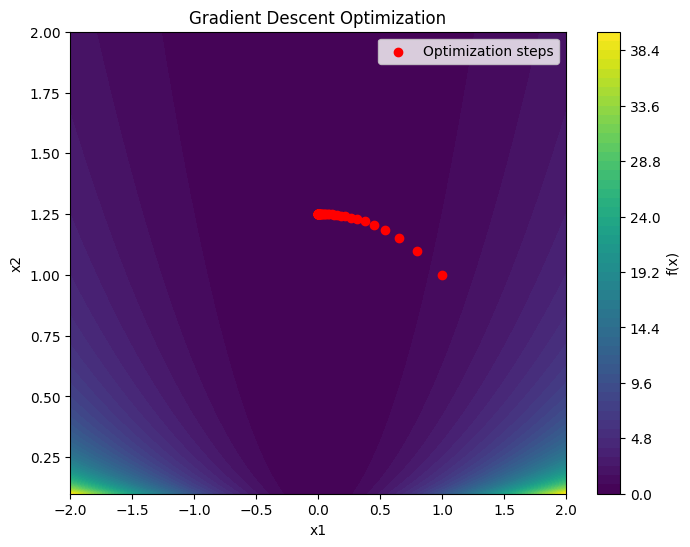

In [ ]:
import matplotlib.pyplot as plt

# Create a grid of x1, x2 values
x1 = torch.linspace(-2, 2, 100)
x2 = torch.linspace(0.1, 2, 100)
X1, X2 = torch.meshgrid(x1, x2)
Z = f(torch.stack([X1, X2]))

# Plot the function f(x)
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the steps taken during optimization
plt.scatter(x1_values, x2_values, color='red', label='Optimization steps')
plt.legend()
plt.title('Gradient Descent Optimization')
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define your MyNet model
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 106206793.14it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64813105.31it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29797546.69it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7836498.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Now, initialize your model, define the optimizer, and perform training using your custom optimizer:


Epoch 1, Mini-batch 300, Loss: 1.7668716170390446
Epoch 1, Mini-batch 600, Loss: 0.7217894279956818
Epoch 1, Mini-batch 900, Loss: 0.4804187913239002
Epoch 2, Mini-batch 300, Loss: 0.39828683058420816
Epoch 2, Mini-batch 600, Loss: 0.367388995885849
Epoch 2, Mini-batch 900, Loss: 0.3433637377371391
Epoch 3, Mini-batch 300, Loss: 0.3190359776467085
Epoch 3, Mini-batch 600, Loss: 0.31318715805808706
Epoch 3, Mini-batch 900, Loss: 0.30155611303945384
Epoch 4, Mini-batch 300, Loss: 0.2893782220532497
Epoch 4, Mini-batch 600, Loss: 0.274823281566302
Epoch 4, Mini-batch 900, Loss: 0.2741333100944757
Epoch 5, Mini-batch 300, Loss: 0.2579114993661642
Epoch 5, Mini-batch 600, Loss: 0.26000309569140273
Epoch 5, Mini-batch 900, Loss: 0.24109914466738702
Epoch 6, Mini-batch 300, Loss: 0.2336780121177435
Epoch 6, Mini-batch 600, Loss: 0.22955389613906543
Epoch 6, Mini-batch 900, Loss: 0.2240590582539638
Epoch 7, Mini-batch 300, Loss: 0.21947763005892434
Epoch 7, Mini-batch 600, Loss: 0.202396535364

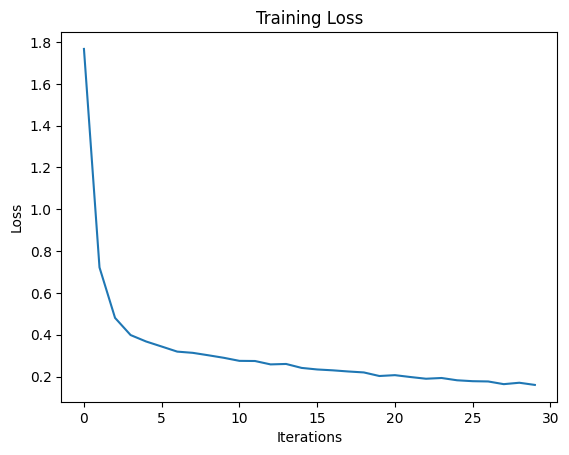

In [ ]:
# Initialize the model, optimizer, and loss function
model = MyNet()
optimizer = MyGD(params=model.parameters(), lr=0.01)  # Using your custom optimizer
loss_fn = nn.CrossEntropyLoss()

# Training loop
losses = []

for epoch in range(10):  # Adjust the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 299:  # Print every 300 mini-batches
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 300}')
            losses.append(running_loss / 300)
            running_loss = 0.0

# Plotting the loss function
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


Second Question

<ipython-input-42-221a52d19694>:64: RuntimeWarning: divide by zero encountered in double_scalars
  rho = 1.0 / np.dot(y, s)
<ipython-input-42-221a52d19694>:66: RuntimeWarning: invalid value encountered in multiply
  V = np.identity(len(s)) - rho * np.outer(y, s)


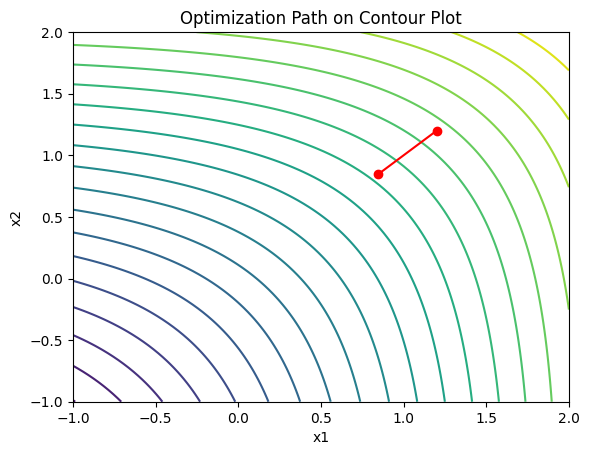

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def f(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Gradient of the objective function
def gradient_f(x):
    exp_term = np.exp(x[0]) + np.exp(x[1])
    return np.array([
        np.exp(x[0]) / exp_term,
        np.exp(x[1]) / exp_term
    ])

def hessian_f(x):
    exp_term = np.exp(x[0]) + np.exp(x[1])
    hessian = np.array([
        [np.exp(x[0]) / exp_term - (np.exp(x[0]) ** 2) / (exp_term ** 2),
         -np.exp(x[0]) * np.exp(x[1]) / (exp_term ** 2)],
        [-np.exp(x[0]) * np.exp(x[1]) / (exp_term ** 2),
         np.exp(x[1]) / exp_term - (np.exp(x[1]) ** 2) / (exp_term ** 2)]
    ])
    return hessian


def initial_BFGS(x):
   gradient_norm = np.linalg.norm(gradient_f(x))
   identity_matrix = np.identity(len(x))
   result = gradient_norm  * identity_matrix
   return result

# Backtracking line search algorithm
def backtracking_line_search(x, d, alpha=1, beta=0.5, max_iter=100):
    t = 1.0
    iter_count = 0
    while iter_count < max_iter and f(x + t * d) > f(x) + alpha * t * np.dot(gradient_f(x), d):
        t *= beta
        iter_count += 1
    return t

# Modify the newtons_method function to collect all intermediate points
def newtons_method(initial_point, tol=1e-6, max_iter=1000):
    x_k = initial_point
    H_inv = np.linalg.inv(initial_BFGS(initial_point))
    path = [x_k]

    for _ in range(max_iter):
        gradient = gradient_f(x_k)
        direction = np.dot(H_inv, -gradient)  # Compute Newton's direction

        step_length = backtracking_line_search(x_k, direction)  # Perform line search

        x_k_next = x_k + step_length * direction
        path.append(x_k_next)

        if np.linalg.norm(x_k_next - x_k) < tol:
            break

        # Update inverse Hessian approximation
        s = step_length * direction
        y = gradient_f(x_k_next) - gradient_f(x_k)

        rho = 1.0 / np.dot(y, s)

        V = np.identity(len(s)) - rho * np.outer(y, s)
        H_inv = np.dot(V, np.dot(H_inv, V.T)) + rho * np.outer(s, s)
        x_k = x_k_next

    return np.array(path)

# Generate contour plot of the objective function
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x1')
plt.ylabel('x2')

# Initial point and run Newton's method
initial_point = np.array([1.2, 1.2])
path = newtons_method(initial_point)

# Extract x and y coordinates for plotting
x_coords = path[:, 0]
y_coords = path[:, 1]

# Plot the optimization path
plt.plot(x_coords, y_coords, marker='o', color='red', linestyle='-')

plt.title('Optimization Path on Contour Plot')
plt.show()


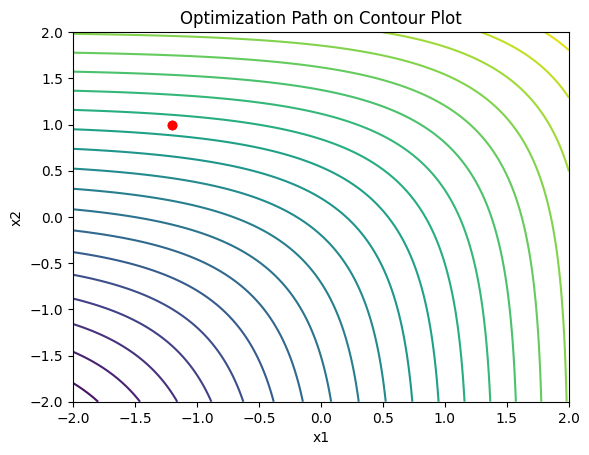

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def f(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Gradient of the objective function
def gradient_f(x):
    exp_term = np.exp(x[0]) + np.exp(x[1])
    return np.array([
        np.exp(x[0]) / exp_term,
        np.exp(x[1]) / exp_term
    ])

def hessian_f(x):
    exp_term = np.exp(x[0]) + np.exp(x[1])
    hessian = np.array([
        [np.exp(x[0]) / exp_term - (np.exp(x[0]) ** 2) / (exp_term ** 2),
         -np.exp(x[0]) * np.exp(x[1]) / (exp_term ** 2)],
        [-np.exp(x[0]) * np.exp(x[1]) / (exp_term ** 2),
         np.exp(x[1]) / exp_term - (np.exp(x[1]) ** 2) / (exp_term ** 2)]
    ])
    return hessian


def initial_BFGS(x):
   gradient_norm = np.linalg.norm(gradient_f(x))
   identity_matrix = np.identity(len(x))
   result = gradient_norm  * identity_matrix
   return result

# Backtracking line search algorithm
def backtracking_line_search(x, d, alpha=1, beta=0.5, max_iter=100):
    t = 1.0
    iter_count = 0
    while iter_count < max_iter and f(x + t * d) > f(x) + alpha * t * np.dot(gradient_f(x), d):
        t *= beta
        iter_count += 1
    return t

# Modify the newtons_method function to collect all intermediate points
def newtons_method(initial_point, tol=1e-6, max_iter=1000):
    x_k = initial_point
    H_inv = np.linalg.inv(initial_BFGS(initial_point))
    path = [x_k]

    for _ in range(max_iter):
        gradient = gradient_f(x_k)
        direction = np.dot(H_inv, -gradient)  # Compute Newton's direction

        step_length = backtracking_line_search(x_k, direction)  # Perform line search

        x_k_next = x_k + step_length * direction
        path.append(x_k_next)

        if np.linalg.norm(x_k_next - x_k) < tol:
            break

        # Update inverse Hessian approximation
        s = step_length * direction
        y = gradient_f(x_k_next) - gradient_f(x_k)

        rho = 1.0 / np.dot(y, s)

        V = np.identity(len(s)) - rho * np.outer(y, s)
        H_inv = np.dot(V, np.dot(H_inv, V.T)) + rho * np.outer(s, s)
        x_k = x_k_next

    return np.array(path)

# Generate contour plot of the objective function
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x1')
plt.ylabel('x2')

# Initial point and run Newton's method
initial_point = np.array([-1.2, 1])
path = newtons_method(initial_point)

# Extract x and y coordinates for plotting
x_coords = path[:, 0]
y_coords = path[:, 1]

# Plot the optimization path
plt.plot(x_coords, y_coords, marker='o', color='red', linestyle='-')

plt.title('Optimization Path on Contour Plot')
plt.show()


In [ ]:
import numpy as np

# Objective function
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Gradient of the objective function
def gradient(x):
    exp_term = np.exp(x)
    return np.array([
        exp_term[0] / (exp_term[0] + exp_term[1]),
        exp_term[1] / (exp_term[0] + exp_term[1])
    ])


In [ ]:
def line_search_BFGS(f, grad, x_init, max_iter=1000, tol=1e-6, alpha=1.0, beta=0.5):
    x = x_init.copy()
    H = np.eye(len(x))  # Initial approximation of the Hessian matrix
    path = [x]  # Record of optimization steps

    for _ in range(max_iter):
        gradient_x = grad(x)
        if np.linalg.norm(gradient_x) < tol:
            break

        p = -np.dot(H, gradient_x)

        # Backtracking line search
        t = alpha
        while f(x + t * p) > f(x) + beta * t * np.dot(grad(x), p):
            t *= beta

        x = x + t * p

        s = t * p
        y = grad(x) - gradient_x

        # BFGS update for the approximation of the Hessian matrix
        rho = 1.0 / np.dot(y, s)
        A = np.eye(len(x)) - rho * np.outer(s, y)
        B = np.eye(len(x)) - rho * np.outer(y, s)
        H = np.dot(np.dot(A, H), B) + rho * np.outer(s, s)

        path.append(x)

    return np.array(path)


<ipython-input-54-8d7046098c07>:24: RuntimeWarning: divide by zero encountered in double_scalars
  rho = 1.0 / np.dot(y, s)
<ipython-input-54-8d7046098c07>:25: RuntimeWarning: invalid value encountered in multiply
  A = np.eye(len(x)) - rho * np.outer(s, y)
<ipython-input-54-8d7046098c07>:26: RuntimeWarning: invalid value encountered in multiply
  B = np.eye(len(x)) - rho * np.outer(y, s)


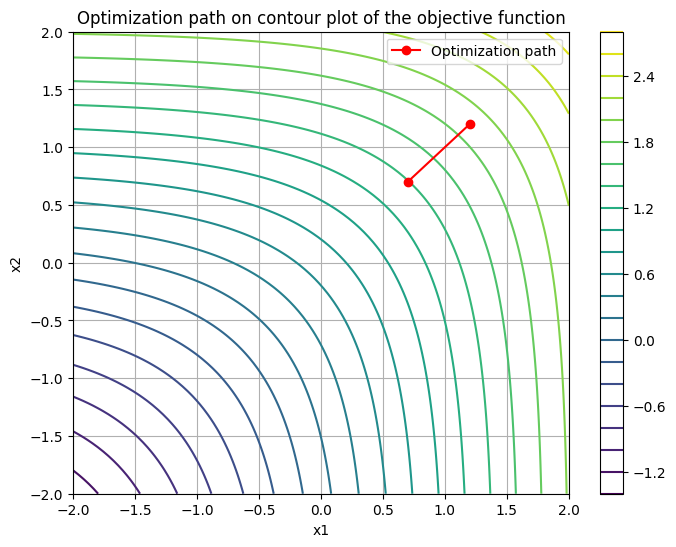

In [ ]:
import matplotlib.pyplot as plt

# Define the objective function for contour plotting
def objective_func_plot(x, y):
    return np.log(np.exp(x) + np.exp(y))

# Define a meshgrid for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = objective_func_plot(X, Y)

# Perform optimization
initial_point = np.array([1.2, 1.2])
optimization_path = line_search_BFGS(objective_function, gradient, initial_point)

# Plot contours of the objective function and optimization path
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.plot(optimization_path[:, 0], optimization_path[:, 1], marker='o', color='red', label='Optimization path')
plt.title('Optimization path on contour plot of the objective function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.colorbar()
plt.show()


<ipython-input-63-4fcc916c03c2>:7: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-63-4fcc916c03c2>:7: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-63-4fcc916c03c2>:7: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


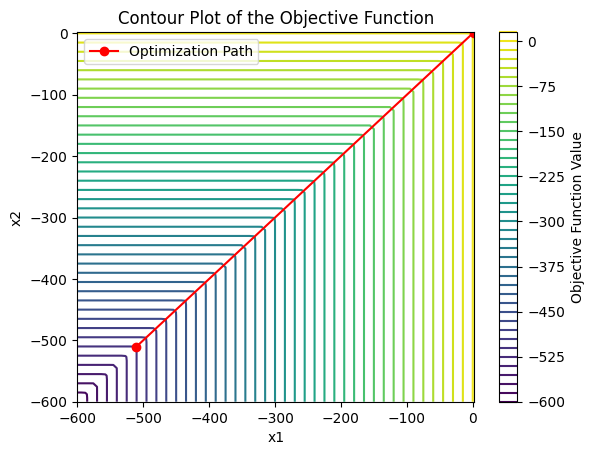

In [63]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np

# Define the objective function
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Define the objective function for contour plotting
def f_contour(x, y):
    return np.log(np.exp(x) + np.exp(y))

# Plot contour of the objective function
x_vals = np.linspace(-600, 2, 100)
y_vals = np.linspace(-600, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_contour(X, Y)

#plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Objective Function Value')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of the Objective Function')

# Initial guess
x_initial = [1.2, 1.2]

# Function to record steps for visualization
steps = [x_initial]

# Callback function to record steps taken by optimizer
def record_steps(x):
    steps.append(x)

# Minimize the objective function using BFGS method (quasi-Newton) with line search
result = minimize(objective_function, x_initial, method='BFGS', callback=record_steps)

# Extract x and y coordinates of steps
x_steps = [step[0] for step in steps]
y_steps = [step[1] for step in steps]

# Plot the optimization path
plt.plot(x_steps, y_steps, '-ro', label='Optimization Path')
plt.legend()
plt.show()
